## Importing Libraries

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [177]:
df = pd.read_csv(r'C:\Users\Akshata Agine\Desktop\Projects\Taxi Max Revenue Statistical Analysis\2020_Yellow_Taxi_Trip_Data (1).csv.crdownload')

In [178]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


## Exploratory data analysis

In [179]:
df.shape

(2281673, 18)

In [180]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID             float64
DOLocationID             float64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [181]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [182]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60

In [183]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238.0,239.0,1.0,6.00,3.0,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239.0,238.0,1.0,7.00,3.0,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238.0,238.0,1.0,6.00,3.0,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238.0,151.0,1.0,5.50,0.5,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193.0,193.0,2.0,3.50,0.5,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281668,NaN,2020-07-09 02:22:45,2020-07-09 02:42:21,NaN,11.71,NaN,NaN,167.0,226.0,NaN,42.28,0.0,0.5,0.00,6.12,0.3,49.20,0.0,19.600000
2281669,1.0,2020-01-12 21:05:48,2020-01-12 21:16:20,1.0,3.50,1.0,N,161.0,74.0,1.0,12.00,3.0,0.5,2.00,0.00,0.3,17.80,2.5,10.533333
2281670,2.0,2020-01-12 21:26:03,2020-01-12 21:37:51,1.0,1.96,1.0,N,48.0,234.0,1.0,9.50,0.5,0.5,1.50,0.00,0.3,14.80,2.5,11.800000
2281671,2.0,2020-01-12 21:11:44,2020-01-12 21:15:10,1.0,0.73,1.0,N,141.0,237.0,1.0,4.50,0.5,0.5,2.08,0.00,0.3,10.38,2.5,3.433333


In [184]:
df = df[['passenger_count','payment_type', 'fare_amount', 'trip_distance', 'duration']]

In [185]:
df.isnull().sum()

passenger_count    4896
payment_type       4896
fare_amount           1
trip_distance         1
duration              0
dtype: int64

In [186]:
(4896/len(df))*100

0.21457938977232932

In [187]:
df.dropna(inplace = True)

In [188]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
2281666,1.0,1.0,7.0,1.67,6.466667
2281667,1.0,2.0,9.0,1.77,10.716667
2281669,1.0,1.0,12.0,3.50,10.533333
2281670,1.0,1.0,9.5,1.96,11.800000


In [189]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [190]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2064,1,2,7.0,0.00,0.000000
2451,1,1,52.0,0.00,0.200000
2456,2,1,9.5,1.70,13.066667
2476,1,1,4.0,0.40,3.083333
3358,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
2281665,1,2,8.5,1.93,8.833333
2281666,1,1,7.0,1.67,6.466667
2281667,1,2,9.0,1.77,10.716667
2281670,1,1,9.5,1.96,11.800000


In [191]:
df.drop_duplicates(inplace = True) 

In [192]:
df['passenger_count'].value_counts(normalize = True)          #parameter (normalize = True) gives the percentage count

passenger_count
1    0.598226
2    0.193133
3    0.063398
5    0.055055
4    0.034887
6    0.033320
0    0.021960
7    0.000009
8    0.000008
9    0.000004
Name: proportion, dtype: float64

In [193]:
df['payment_type'].value_counts(normalize = True)

payment_type
1    0.670725
2    0.317099
3    0.007671
4    0.004504
Name: proportion, dtype: float64

In [194]:
df = df[df['payment_type']<3]
df = df[(df['passenger_count']>0)&(df['passenger_count']<6)]

In [195]:
df.shape

(1290342, 5)

In [196]:
df['payment_type'].replace([1,2], ['Card','Cash'], inplace = True)

In [197]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
4,1,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
2281654,2,Card,6.0,1.25,4.800000
2281659,1,Cash,11.0,2.75,12.166667
2281662,1,Card,13.0,3.54,13.216667
2281663,1,Cash,17.0,5.37,14.750000


In [198]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,1.290342e+06,1.290342e+06,1.290342e+06,1.290342e+06
mean,1.686003e+00,1.608954e+01,4.062751e+00,2.103583e+01
std,1.130543e+00,1.417229e+01,4.676765e+00,8.445695e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,8.000000e+00,1.320000e+00,8.483333e+00
50%,1.000000e+00,1.150000e+01,2.360000e+00,1.365000e+01
75%,2.000000e+00,1.850000e+01,4.600000e+00,2.060000e+01
max,5.000000e+00,1.238000e+03,2.628800e+02,4.168000e+03


In [199]:
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]

{'whiskers': [<matplotlib.lines.Line2D at 0x28a43c33620>,
 'caps': [<matplotlib.lines.Line2D at 0x28a43c33a40>,
 'boxes': [<matplotlib.lines.Line2D at 0x28a43c33380>],
 'medians': [<matplotlib.lines.Line2D at 0x28a6ba900b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28a6ba90350>],
 'means': []}

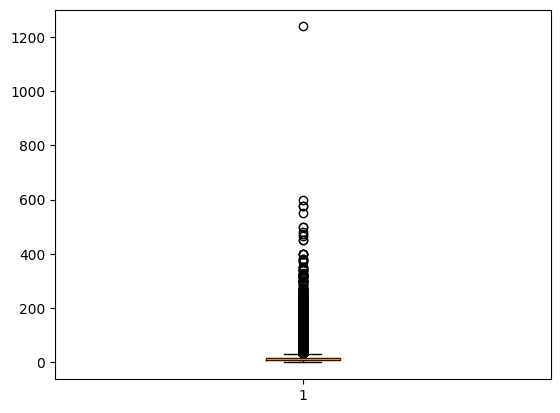

In [200]:
plt.boxplot(df['fare_amount'])

In [201]:
for col in['fare_amount','trip_distance','duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    
    lower_bound = q1 -1.5*IQR
    upper_bound = q3 +1.5*IQR
    
    df  =df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
2281654,2,Card,6.0,1.25,4.800000
2281659,1,Cash,11.0,2.75,12.166667
2281662,1,Card,13.0,3.54,13.216667
2281663,1,Cash,17.0,5.37,14.750000


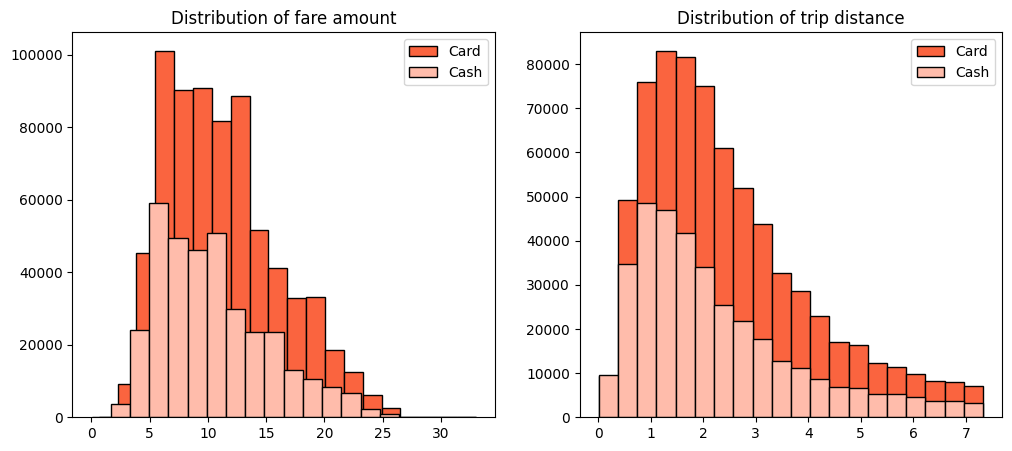

In [202]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type'] == 'Card']['fare_amount'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#FA643F', label = 'Card' )
plt.hist(df[df['payment_type'] == 'Cash']['fare_amount'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#FFBCAB', label = 'Cash' )
plt.legend()


plt.subplot(1,2,2)
plt.title('Distribution of trip distance')
plt.hist(df[df['payment_type'] == 'Card']['trip_distance'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#FA643F', label = 'Card' )
plt.hist(df[df['payment_type'] == 'Cash']['trip_distance'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#FFBCAB', label = 'Cash' )
plt.legend()
plt.show()

In [203]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'], 'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           11.312767  4.807075      2.476093  1.561471
Cash           10.462659  4.761832      2.232366  1.563516

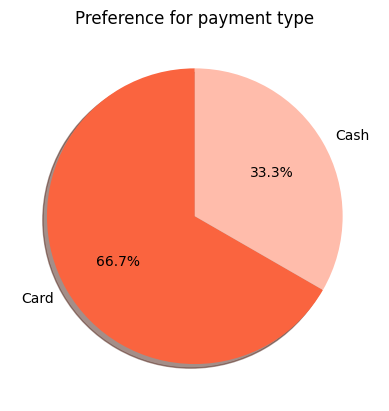

In [204]:
plt.title('Preference for payment type')
plt.pie(df['payment_type'].value_counts(normalize = True),labels = df['payment_type'].value_counts().index,
    startangle = 90, shadow = True, autopct = '%1.1f%%', colors = ['#FA643F','#FFBCAB'])
plt.show()

In [205]:
df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()

passenger_count
payment_type passenger_count                 
Card         1                         429455
             2                         150538
             3                          51372
             4                          25858
             5                          48130
Cash         1                         221287
             2                          72145
             3                          24340
             4                          15545
             5                          19112

In [206]:
passenger_count = df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count': 'count'}, inplace = True)
passenger_count.reset_index(inplace = True)

In [207]:
passenger_count['percantage'] = (passenger_count['count']/passenger_count['count'].sum())*100
passenger_count

,payment_type,passenger_count,count,percantage
0,Card,1,429455,40.599575
1,Card,2,150538,14.231477
2,Card,3,51372,4.856577
3,Card,4,25858,2.444549
4,Card,5,48130,4.550087
5,Cash,1,221287,20.919906
6,Cash,2,72145,6.820403
7,Cash,3,24340,2.301041
8,Cash,4,15545,1.469584
9,Cash,5,19112,1.806800


In [208]:
df1 = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df1['payment_type'] = ['Card','Cash']
df1.iloc[0,1:] = passenger_count.iloc[0:5, -1]
df1.iloc[1,1:] = passenger_count.iloc[5:, -1]
df1

,payment_type,1,2,3,4,5
0,Card,40.599575,14.231477,4.856577,2.444549,4.550087
1,Cash,20.919906,6.820403,2.301041,1.469584,1.8068


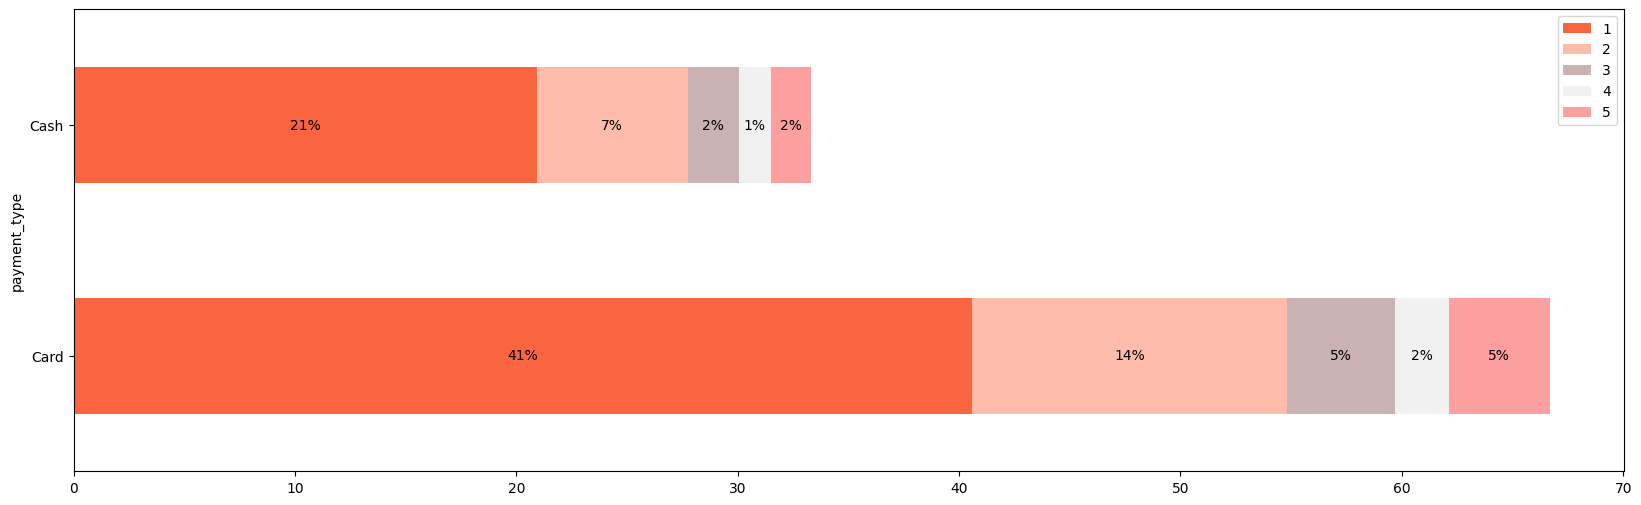

In [209]:
fig, ax = plt.subplots(figsize = (20,6))
df1.plot(x = 'payment_type', kind = 'barh', stacked = True, ax = ax, color = ['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'])

# Add percentage text

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment = 'center',
            verticalalignment = 'center')

## Hypothesis Testing

Null Hypothesis: There is no difference in average fare between customers who use credit cards and customers who use cash.

Alternate Hypothesis: There is a difference in average fare between customers who use credit cards and customers who use cash.

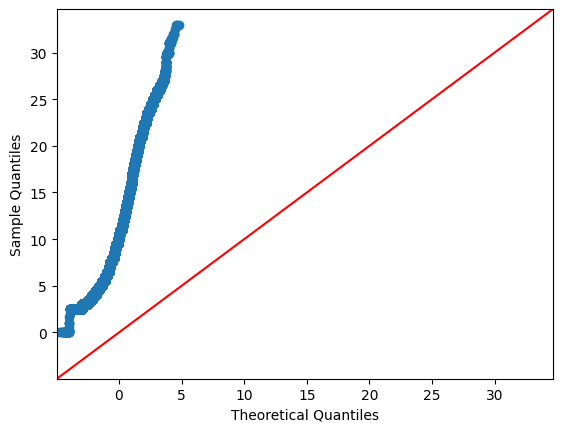

In [210]:
sm.qqplot(df['fare_amount'], line = '45')
plt.show()

In [211]:
card_sample = df[df['payment_type'] == 'Card']['fare_amount']
cash_sample = df[df['payment_type'] == 'Cash']['fare_amount']


In [213]:
t_stats, p_value = st.ttest_ind(a = card_sample, b = cash_sample, equal_var = False)
print('T Statistic', t_stats, 'p-value', p_value)

T Statistic 86.27078297632833 p-value 0.0


In [214]:
df.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
